# Notebook Examen PAPY 2022

# Partie 2: Programmation sur machine
Vous avez terminé la partie connaissance du python de cet examen. Maintenant, vous devez proposer un programme qui réalise le chiffrement suivant.

## Présentation du problème: Chiffrment par dictionnaire

### Chiffrement de César
En cryptographie, le chiffrement par décalage, aussi connu comme le chiffre de César, est une méthode de chiffrement très simple utilisée par Jules César dans ses correspondances secrètes.

![](img/Caesar3.svg)

Le texte chiffré s'obtient en remplaçant chaque lettre du texte clair original par une lettre à distance fixe, toujours du même côté, dans l'ordre de l'alphabet. Pour les dernières lettres (dans le cas d'un décalage à droite), on reprend au début. Par exemple avec un décalage de 3 vers la droite, A est remplacé par D, B devient E, et ainsi jusqu'à W qui devient Z, puis X devient A etc. Il s'agit d'une permutation circulaire de l'alphabet. La longueur du décalage, 3 dans l'exemple évoqué, constitue la clé du chiffrement qu'il suffit de transmettre au destinataire pour que celui-ci puisse déchiffrer le message. 

#### Example
Le chiffrement peut être représenté par la superposition de deux alphabets, l'alphabet clair présenté dans l'ordre normal et l'alphabet chiffré décalé, à gauche ou à droite, du nombre de lettres voulu. Nous avons ci-dessous l'exemple d'un encodage de 3 lettres vers la droite. Le paramètre de décalage (ici 3) est la clé de chiffrement :


| clair  |  ABCDEFGHIJKLMNOPQRSTUVWXYZ
|---    |:-:    |
|   chiffré       |DEFGHIJKLMNOPQRSTUVWXYZABC|

Pour encoder un message, il suffit de regarder chaque lettre du message clair, et d'écrire la lettre encodée correspondante. Pour déchiffrer, on fait tout simplement l'inverse.

| clair  | WIKIPEDIA L'ENCYCLOPEDIE LIBRE    
|---    |:-:    |
| chiffré |ZLNLSHGLD O'HQFBFORSHGLH OLEUH

*Source: Wikipedia*

### Chiffre de Vigenère
Le chiffrage ci-dessus est très faible, même pour une longue table de caractères, par exemple ASCII.

Pour améliorer la sécurité de notre chiffrement, on introduit un chiffrage plus complexe (aussi connue sous le nom de chiffre de Vigenère). Cette fois-ci, au lieu d'utiliser le même décalage pour tous les caractères, on va faire varier le décalage (shift) à chaque caractère. On utilisera pour cela une clé de chiffrage sous la forme d'une chaine de caractères (un mot ou une phrase) pour laquelle chaque lettre détermine le décalage (place dans la table de caractères). Lorsque la clé est épuisée, on reprend au premier élément de celle-ci.

Pour un indice donné `i`, on chiffrera le i-eme caractère du texte  `texte[i]` en applicant le décalage donné par la position de la `clé[i]`  dans le dictionnaire i.e. `shift[i]=position(clé[i],dic)`.


```
alpha="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

Texte en clair :   j'adore ecouter la radio toute la journee
Clé répétée    :   M USIQU EMUSIQU EM USIQU EMUSI QU EMUSIQU
                   ^ ^^^
                   | ||Texte O, clé I : shift=16, on obtient le chiffré H
                   | |Texte D, clé S : shift=18, on obtient le chiffré W
                   | Texte A, clé U : shift=20, on obtient le chiffré U
                   Texte J, clé M : shift=12, on obtient le chiffré V
```
|Dans le notebook d'examen, répondre aux questions suivantes|
|:-|

## Implémentation du Code César
1. Écrire une fonction `caesar(message, alpha, shift)-> str` du codage César. Elle prend pour argument le texte (`message`), la clé (`shift`) et l'alphabet `alpha` et renvoie le texte chiffré. Vous testerez de façon adéquate avec l'alphabet standard `"ABCDEFGHIJKLMNOPQRSTUVWXYZ"`.
1. Encoder le message suivant : "Tu quoque mi fili" avec un décalage de 8.
1. Décoder ce message (en anglais): "ROVVY GYBVN" et en donner la clé.


In [1]:
# 2.2.1 Fonction caesar
def caesar(message:str, dic:"List", shift:int)-> str:
    """Encoding of message by Caesar code, changing the sign of shift reverses encoding."""
    encoded_message=""
    for c in message:
        try:
            pos=(dic.index(c)+shift)%len(dic)
            encoded_message+=dic[pos]
        except:
            encoded_message+=c
    return encoded_message

In [2]:
ABC=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

In [99]:
#2.2.2 Encodage 

In [17]:
def test_abc():
    message="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    coded=caesar(message, ABC, shift=3)
    res=caesar(coded,ABC,shift=-3)
    print(coded)
    assert(coded=='DEFGHIJKLMNOPQRSTUVWXYZABC'), "Encodage ABC échoue"
    assert(res==message),"encodage/décodage ABC échoue"

In [14]:
message="Tu quoque mi fili".upper()
caesar(message, ABC, shift=8)

'BC YCWYCM UQ NQTQ'

In [18]:
def test_222():
    message="Tu quoque mi fili".upper()
    assert('BC YCWYCM UQ NQTQ'==caesar(message, ABC, shift=8)), "les espaces ne sont pas traités"

In [19]:
test_abc()
test_222()

DEFGHIJKLMNOPQRSTUVWXYZABC


In [105]:
# Décodage force brute

On va maintenant utiliser les caractères de la table ASCII imprimable qui va assurer le bon fonctionnement sur un texte en anglais (sans accent). On peut obtenir avec la commande suivante: 
```python
>>> [chr(i) for i in range(32,127)]
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', 
'-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 
';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 
 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}
 ', '~']
```

## Chiffre de Vigenère avec une classe
1. Créer une classe de chiffrement `Vigenere` qui stocke la clé `key` et le tableau de chiffrement `alpha` et qui possède la méthode `code` et `decode`. On s'assurera que l'exemple d'implémentation suivant fonctionne bien:
```python
>>> ASCII=[chr(i) for i in range(32,127)]
>>> enigma=Vignemere(alpha=ASCII,key="my fancy key!")
>>> print(enigma)
Vignemere encoder-decoder with
key="my fancy key!"
alpha=[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',
', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 
'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 
'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
>>> coded_farm=enigma.code(animal_farm)
>>> enigma.decode(coded_farm)
Mr. Jones, of the Manor Farm, had locked the hen-houses for the 
night, but was too drunk to remember to shut the pop-holes...
```
2. Exécuter l'algorithme sur l'exemple de texte ci-dessous avec la clé `"George Orwell wrote more than 1984"` et stocker le résultat dans la variable `code_farm`. 

**Exemple de texte suffisamment long pour obtenir de bonnes statistiques. Animal Farm, George Orwell (1945) en version originale:**

Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes. With the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where Mrs. Jones was already snoring.

As soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to communicate it to the other animals. It had been agreed that they should all meet in the big barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour's sleep in order to hear what he had to say.

At one end of the big barn, on a sort of raised platform, Major was already ensconced on his bed of straw, under a lantern which hung from a beam. He was twelve years old and had lately grown rather stout, but he was still a majestic-looking pig, with a wise and benevolent appearance in spite of the fact that his tushes had never been cut. Before long the other animals began to arrive and make themselves comfortable after their different fashions. First came the three dogs, Bluebell, Jessie, and Pincher, and then the pigs, who settled down in the straw immediately in front of the platform. The hens perched themselves on the window-sills, the pigeons fluttered up to the rafters, the sheep and cows lay down behind the pigs and began to chew the cud. The two cart-horses, Boxer and Clover, came in together, walking very slowly and setting down their vast hairy hoofs with great care lest there should be some small animal concealed in the straw. Clover was a stout motherly mare approaching middle life, who had never quite got her figure back after her fourth foal. Boxer was an enormous beast, nearly eighteen hands high, and as strong as any two ordinary horses put together. A white stripe down his nose gave him a somewhat stupid appearance, and in fact he was not of first-rate intelligence, but he was universally respected for his steadiness of character and tremendous powers of work. After the horses came Muriel, the white goat, and Benjamin, the donkey. Benjamin was the oldest animal on the farm, and the worst tempered. He seldom talked, and when he did, it was usually to make some cynical remark—for instance, he would say that God had given him a tail to keep the flies off, but that he would sooner have had no tail and no flies. Alone among the animals on the farm he never laughed. If asked why, he would say that he saw nothing to laugh at. Nevertheless, without openly admitting it, he was devoted to Boxer; the two of them usually spent their Sundays together in the small paddock beyond the orchard, grazing side by side and never speaking.

In [1]:
### 2.3.1 Classe Vignemere
def vigenere(message,dic,key,decode=False):
    """Encoding of message by Caesar code, changing the sign of shift reverses encoding."""
    encoded_message=""
    for i in range(len(message)):
        try:
            c=message[i]
            shift=dic.index(key[i%len(key)])
            if decode: 
                shift=-shift
            pos=(dic.index(c)+shift)%len(dic)
            encoded_message+=dic[pos]
        except:
            encoded_message+=c
    return encoded_message

class Vigenere():
    def __init__(self,alpha,key):
        self.alpha=alpha
        self.key=key
        
    def code(self,message):
        return vigenere(message,self.alpha,self.key,decode=False)
    
    def decode(self,code):
        return vigenere(code, self.alpha, self.key, decode=True)
    
    def __str__(self):
        string="Vigenere encoder-decoder with \n"
        string+=f"key={self.key}\n"
        string+=f"alpha={self.alpha}\n"
        return string

In [2]:
ASCII=[chr(i) for i in range(32,127)]
enigma=Vigenere(alpha=ASCII,key="my fancy key!")
print(enigma)

Vigenere encoder-decoder with 
key=my fancy key!
alpha=[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']



In [4]:
### 2.3.2 Encodage d'animal farm
enigma=Vigenere(alpha=ASCII,key="George Orwell wrote more than 1984")
animal_farm="""Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes. With the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where Mrs. Jones was already snoring.
As soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to communicate it to the other animals. It had been agreed that they should all meet in the big barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour's sleep in order to hear what he had to say.
At one end of the big barn, on a sort of raised platform, Major was already ensconced on his bed of straw, under a lantern which hung from a beam. He was twelve years old and had lately grown rather stout, but he was still a majestic-looking pig, with a wise and benevolent appearance in spite of the fact that his tushes had never been cut. Before long the other animals began to arrive and make themselves comfortable after their different fashions. First came the three dogs, Bluebell, Jessie, and Pincher, and then the pigs, who settled down in the straw immediately in front of the platform. The hens perched themselves on the window-sills, the pigeons fluttered up to the rafters, the sheep and cows lay down behind the pigs and began to chew the cud. The two cart-horses, Boxer and Clover, came in together, walking very slowly and setting down their vast hairy hoofs with great care lest there should be some small animal concealed in the straw. Clover was a stout motherly mare approaching middle life, who had never quite got her figure back after her fourth foal. Boxer was an enormous beast, nearly eighteen hands high, and as strong as any two ordinary horses put together. A white stripe down his nose gave him a somewhat stupid appearance, and in fact he was not of first-rate intelligence, but he was universally respected for his steadiness of character and tremendous powers of work. After the horses came Muriel, the white goat, and Benjamin, the donkey. Benjamin was the oldest animal on the farm, and the worst tempered. He seldom talked, and when he did, it was usually to make some cynical remark—for instance, he would say that God had given him a tail to keep the flies off, but that he would sooner have had no tail and no flies. Alone among the animals on the farm he never laughed. If asked why, he would say that he saw nothing to laugh at. Nevertheless, without openly admitting it, he was devoted to Boxer; the two of them usually spent their Sundays together in the small paddock beyond the orchard, grazing side by side and never speaking."""
coded_farm=enigma.code(animal_farm)
coded_farm

'tX}r2Un5f$e\\S l[Ut3a\\_eeFV[Oz yz|44US^MJ D[]eURn%[_jYeaoYUrt]JT  # |<qoU]Z GTkea\\owWbjTkmdberZVG\\bv,8)7ec[]Z D[]e]\\p%[_aKs{oJOt]hVWe1,"#/e_YgRi7[leS_oerX^Y ZQaZegWaSa |"#/eVeWS C\\\\KlaowfYYK,mXXelj[EWeu9yw:UcfgZh5rqG_Q,w^YXQeRobLftQKb s)();eQggZh5rZGPX \\b_gq RbX] ]RObe} 8uGRQf\\eg<TkYl\\fwUUZX TbbS iQGnbr,+y4eYagZh5rkIbYl]ei!ea\\TrSaYNaWi%90uAeecgZoOU]Jxlw`XbZeM`c!eJdWGb )z,4)RbXIJyOffU_Vn_!\n6Y a_bT V\\achv9%}/NdrQT D[]eORdjb_bewS^geoj]achv,}4?GcrIesD\\jXV[gwT^YeamV_[tiNTXnx9y!4ed[ZUu7[wZUR ^TbbebcY_JicPU| h)+xGNQWgMo>XwX\\bn\\rTjXi\\WrZhZhFPy1.!u<e__LeM1]gXxlt`XoeXihUr3iYMNT h"")-eRbIX,O[YJlUa\\rQtYt`QaMetMTTa~9(#GZXXgVr5iaUb` f\\W]Z O^Wew^\\JTd1.(4+U]`]Ti3TlKlVtwg_tZhSobZhZ[aPnz\'y!;so<\\eh1WwHRRnwTWgKeRogNaihVWe+9,|7[\\WgGl<reKRa aaoiNemR\\M WJT] r-8(7U^rIY |e&e7\\n]folGsmcTLeaba^u&9(zGZXXg]aI!w5YQ ETZdX ucbehZhYPs1z%,)_crKGl<X\\qlahghW]etVUrTabNadnu~+4?NYVPeh5r`GQlb]X^tKxVYUOtZMafa%9o}4RYaOJo>r:KNbtq{olGsmcbeh^PJ[y1,}{)XTXLeo>rlNRlfYe]tZhOdrKvZ[[^nv90u;eahQZeOe]GQf lboaUsS

In [79]:
def test_coded_farm():
    animal_farm="""Mr. Jones, of the Manor Farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes. With the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where Mrs. Jones was already snoring.
As soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to communicate it to the other animals. It had been agreed that they should all meet in the big barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour's sleep in order to hear what he had to say.
At one end of the big barn, on a sort of raised platform, Major was already ensconced on his bed of straw, under a lantern which hung from a beam. He was twelve years old and had lately grown rather stout, but he was still a majestic-looking pig, with a wise and benevolent appearance in spite of the fact that his tushes had never been cut. Before long the other animals began to arrive and make themselves comfortable after their different fashions. First came the three dogs, Bluebell, Jessie, and Pincher, and then the pigs, who settled down in the straw immediately in front of the platform. The hens perched themselves on the window-sills, the pigeons fluttered up to the rafters, the sheep and cows lay down behind the pigs and began to chew the cud. The two cart-horses, Boxer and Clover, came in together, walking very slowly and setting down their vast hairy hoofs with great care lest there should be some small animal concealed in the straw. Clover was a stout motherly mare approaching middle life, who had never quite got her figure back after her fourth foal. Boxer was an enormous beast, nearly eighteen hands high, and as strong as any two ordinary horses put together. A white stripe down his nose gave him a somewhat stupid appearance, and in fact he was not of first-rate intelligence, but he was universally respected for his steadiness of character and tremendous powers of work. After the horses came Muriel, the white goat, and Benjamin, the donkey. Benjamin was the oldest animal on the farm, and the worst tempered. He seldom talked, and when he did, it was usually to make some cynical remark—for instance, he would say that God had given him a tail to keep the flies off, but that he would sooner have had no tail and no flies. Alone among the animals on the farm he never laughed. If asked why, he would say that he saw nothing to laugh at. Nevertheless, without openly admitting it, he was devoted to Boxer; the two of them usually spent their Sundays together in the small paddock beyond the orchard, grazing side by side and never speaking."""
    coded_farm=enigma.code(animal_farm)
    assert(coded_farm==""";l.f,^R_sweigmnhLa<Eho^e@b`g,fJPHyl[IefRytOGnL_nxNiva_sfH^VytTKyoWah[mnFotk][tmnoVaSVonWenpmleTG\\F_rkZi!abu[acL_ \\Uj.VilLU|cQi`NyuV_ YK]KyoRefjUbtfHaSg TOm!Z[n[GaRydMT]j\\a MT^QysUJ_!bi ZKSI& TKymclcOGSc[c^UmtmnhLahEldweejQeeKa^J` TOm!Pio[UnEn `N_!P[cRaSSirwe^sSq OK\\W_lRe[!Z[s[aVP[s_eigm\\eLTnJloYeniSybHTaIf UTyuV_ ZEdPfe^_&!OhdfOPH_ TOm!e[yfW_cnokH_eyywOGaIyM^Y(!8inLUn[[skGfsS[d`abRirUTa/\n\nAZabSinkGm!bbefNXKbtkOh!bbefDTHlo[SyxShtfQdXytTKlfmqaZaPcmtUXlj\\a HPSc[ RRoub_rPPVc[lXeni`iuNJnXbekL[s[yb\\K[HcnSY(!EirKaWE^ SUhfmlo\\PSc^u^OhhmnhLaSEs `N[umilKa<Edo^qyuV_ WTX^_ 9O^eZ_ >JXX_ NU[syyhHFnL[dkGytblaUITc^rQGg!]h [JTcjrQ\\cpcm UKVLn MT^!ecsOGScnokIin[onPEPX_ UZyu]ytOGnSnhQXyb\\cmHNbqyI`ebbRybLG]c[g^K_emnhHVnXbeeemi]olKaPPf YK_umcnfVWIybUMycOlnfCbcmo[TybayMYon.inQYyxOm ZCUIfykUoumiffVWIywM_(!=fdf/PNirkmmpmbefYPWyaX][zaycHN[I^,kZbpcahfVWIynMS_!chdLTn[biONyiSyhHFnF_eZe_yVcbPVTHywMYyXWflPPVHink(_bcnyoafEm _UyiWahS[nV_gMX^fRyoUacL_ RGlnmnhHVnIpe^_ioSywHUnUoi`KysS[d`acSyl[Y_!Oh OQdV!skYffSj PPnSldQXyu]yhLCacqhMZyiSyhHFnXi _Gs/\n\nA[a^R_ QT^!]` [JTc\\iSe\\b`h,fQ]c[ _UlumiffTPMmePejmOnfVT\\oyMMPismqaZaPPleMJs!ShsJQ]G_dkUh!VcsfDTHyoRemu`[wradR^e^e[!Z[n[GaRywTO]imbuUInJloYe[!P_aTon,_ cGm!bqeSXTcseMXm!]fdfC]HyhMJymOneS[nKlocTysOnhLTnWnoaZ&!PotfJTcqa_emuWflfCnQ[jQYnjQ'lVQZMhgkVchyywPVWc[ cOmfm[nKaQIhebUff\\n HR_I[rMT]fmcnfU_MnekU`!bbefHPGn `N[umbiZacYmhQYyiO^ UGeIl NK_om]u[on&_f[X_!ZinNacL_ [Zbf`yaUK\\EfskH_hOh [QnElrU\\_!OhdfOPO_ `N_na_l]Gbc]oYLisb[bSGnE`tQXyuV_iYaSM`fQX_obyfHUWMin_syGWls[aREgekZbfmnhYGTc^oSY&!0fuLDTPf,k0_taceraPR^ <OhdV_rraPR^ `N_omnhLa_Masweqi]ysLVcP_dkJix\\yiUacL_ _ZlbeyiTOTHca`KfzmcnfHaShtkU`!bbefR[Enf[Xg/mNhLaWIhskV_sQbeKacL_m_KfwSm VPnXbek]coRiwsUXPfsweniSypPITShskLfvbneYGScopkZi!bbefTPJne^Y&!bbefUWI_pkGhem]o^UnP[ykJix\\ybLJXR^ `N_!^cgZaPR^ NKab\\ytVaRL_wkZbfm]uKon8bekZqpm]aYV{Lir_Km-m<o_Gac[nPe=m]peYmnG[mQecomnoNGcL_rweqbZeiUInZ_reemm]ql`aPR^ _KnuWhgfF^[h `N_j`yvHUccbaUXs!VioMUn[ctTeasS[tfEPV_ XKmumnhLTTcmh[[fem\\efU^Q_ _S[mZyaUK\\Ef OUhdS[lLFnMh `N_!anrHY|c=l[\\_smqaZaPcmt[[n![itOGaPs YGlfm[pWT^E]hUTa![cdKNTcfiRK&!ebofJPHynQ\\_smkuPVTcao`ebf`yfPIdV_ NG]lm[f[Gacbe^e`pcltOaUS[lye<pf_rfYPWyaZe_o]lmVWbc\\eMYn-mheHT[]yeUMbuS_nfJPR^skNchV& HPSc[skYns]hgfCbc[neenx]yoYFXR[reebp`meZa_Yn `UafbbeYon%ywTOnfmmtYK_Iyd[]h!VcsfP^W_ SGpfmbiTaPcmoYKqiOn ZVdTcdkGjqS[rHPRI& MT^!Wh MCRXyhQeqbaynVVnS` ROltb'rHVTccn`KfmWaeUEToybaZyiSywHUnYhibKltOfl`aaImpQInfRyfVTnLcskYnfO^iUGbWyoRe]iOlaJVTVyaZJyu`_mLPSSoskVixSlsfQUcqo^Q(!/`tLTnXbekNisa_sfEPQ_ 9[ljSf,fVWIywTOnfmaoHVzc[nPe<f\\daTK]oytTKye]hkL[|c<eZP[nWh ^CbcnhQeimR_s[aPRcmMRyp\\ytOGnJ[rYqyb\\^ [JTcqo^Yn!b_mWGaI^.k._!a_lKQ\\cnaXQ_eyyaUFn[beZebfm^iKmnMn cGm!cmuHN[]yt[egbY_ ZQ\\IyceTcdOf YG\\Elk—LismcnZVPR]ewebfmqo\\NScmaeeniOn .QScbaPeajd_nfJXQyakZ[jZytVaZI_pkZbfm`lPGbcifRqyccn [JPXyhQeqpcfdfU^She^ebbd_ OCSchokZ[jZyaUFnRi RRcfa( (N^R_ MSioUytOGnEhiYGftminfVWIyfMXg!V_ UGeIl XGohV_dta8Jya_Q_emqh`mnL_ cUomRysH[nXba`ebfmma^a]SnhUTa!bi SCdKb MZ(!<_vLTcL_lQYm-mqi[J^Yn [V_oZs HF\\MntUTa!Wn,fJTcqa_e^fditLFnXi .Urf`5 [JTcnw[eigmnhLOnYmuMRfzmmpLPccnhQOl!AonKChWyt[M_uV_rfK]cnhQemnOflfRPH^oOQycSsoUFnXbekUldV[rKmnKlafOhhmmiKGnFs _O^fm[nKa]Ipe^emqS[kPPVq""")

In [80]:
test_coded_farm()

AssertionError: 

## Codage et décodage d'un vrai texte
*On va maintenant démontrer la faiblesse du code César et la relative force du code de Vigenère.*

### Casser César
Dans cet exercice, on va attaquer le texte chiffré (avec la table `ASCII`) par la méthode César suivant:

In [50]:
message_secret="""Lok ~sp v*s}*lo~~o|*~rkx* qv$8
O#zvsms~*s}*lo~~o|*~rkx*swzvsms~8
]swzvo*s}*lo~~o|*~rkx*mywzvo#8
Mywzvo#*s}*lo~~o|*~rkx*mywzvsmk~on8
Pvk~*s}*lo~~o|*~rkx*xo}~on8
]zk|}o*s}*lo~~o|*~rkx*nox}o8
\oknklsvs~$*my x~}8
]zomskv*mk}o}*k|ox1~*}zomskv*oxy qr*~y*l|oku*~ro*| vo}8
Kv~ry qr*z|km~smkvs~$*lok~}*z |s~$8
O||y|}*}ry vn*xo!o|*zk}}*}svox~v$8
_xvo}}*o#zvsms~v$*}svoxmon8
Sx*~ro*pkmo*yp*kwlsq s~$6*|op }o*~ro*~owz~k~syx*~y*q o}}8
^ro|o*}ry vn*lo*yxo77*kxn*z|opo|klv$*yxv$*yxo*77yl!sy }*"k$*~y*ny*s~8
Kv~ry qr*~rk~*"k$*wk$*xy~*lo*yl!sy }*k~*ps|}~* xvo}}*$y 1|o*N ~mr8
Xy"*s}*lo~~o|*~rkx*xo!o|8
Kv~ry qr*xo!o|*s}*yp~ox*lo~~o|*~rkx*4|sqr~4*xy"8
Sp*~ro*swzvowox~k~syx*s}*rk|n*~y*o#zvksx6*s~1}*k*lkn*snok8
Sp*~ro*swzvowox~k~syx*s}*ok}$*~y*o#zvksx6*s~*wk$*lo*k*qyyn*snok8
Xkwo}zkmo}*k|o*yxo*ryxusxq*q|ok~*snok*77*vo~1}*ny*wy|o*yp*~ry}o+"""

Puisqu'il est mono-dictionnaire, on propose de l'attaquer par une analyse fréquentielle. En effet, la fréquence des lettres dans une langue donnée tend vers une valeur connue si le texte est suffisamment long et varié. Par exemple, on retrouve les 5 lettres les plus utilisées dans les textes en anglais.

| Lettre  |  Fréquence |
|---    |:-:    |
|E 	|13%  |	 
|T 	|9.1% |  	
|A 	|8.2% | 	
|O 	|7.5% | 	
|I 	|7%   | 	

On aura par exemple la répartition suivante sur le texte clair de notre `message_secret`.

![](img/freq_en.png)

1. Écrire une fonction `compute_frequency` qui calcule la fréquence des caractères dans un texte donné.
```python
>>> compute_frequency(message)
'*': 0.14355231143552297,
 'o': 0.10462287104622861,
 '~': 0.09002433090024323,
 'k': 0.06082725060827245,
 's': 0.059610705596107004
```
2. Grâce à `matplotlib` et en particulier `plt.bar(coord,height, label=...)`, proposer un graphe similaire à celui présenté au-dessus.
3. À partir de `compute_frequency`, décoder le `message_secret` sans utiliser la force brute. 

In [45]:
### 2.4.1.1 fonction compute_frequency +  test
import collections
def compute_frequency(message:str)->"dict":
    freq_inc=1/len(message)
    freq={}
    for c in message:
        if c in [*freq]:
            freq[c]+=freq_inc
        else:
            freq[c]=freq_inc
    return dict(sorted(freq.items(), key=lambda item: item[1],reverse=True))

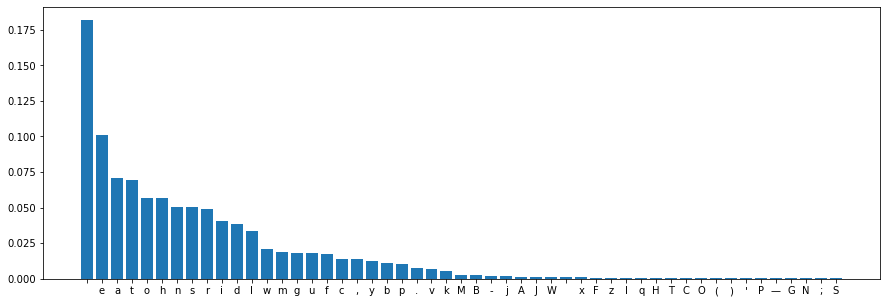

In [48]:
### 2.4.1.2 Plot
def plot_freq(data):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    names = list(data.keys())
    values = list(data.values())

    plt.bar(range(len(data)), values, tick_label=names)
    plt.show()
    
plot_freq(compute_frequency(animal_farm))

In [55]:
### Décodage de message_secret
def auto_decode(code,dic):
    freq=compute_frequency(code)
    most_common=list(freq.keys())[0]
    shift=dic.index(most_common)-dic.index(" ")
    print(shift)
    return caesar(code,dic,-shift)

print(auto_decode(message_secret,ASCII))

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Se casser les dents sur Vigenère
*À l'inverse, le code de Vigenère ne peut pas être attaqué directement par recherche fréquentielle.*

1. Utiliser `compute_frequency` sur le résultat de codage Vigenère `code_farm`. Expliquer le résultat.
2. À la lumière de cette analyse, proposer une méthode ou un critère qui assure une bonne robustesse pour le code de Vigenère.
3. Proposer un algorithme d'attaque par force brute.
   1. Quel est le nombre d'évaluations en fonction de la longueur de la clé? 
   2. Le tester sur le texte chiffré suivant (clé à deux caractères). 
   
```
'!)9-Jy4(4C!-.-'
```

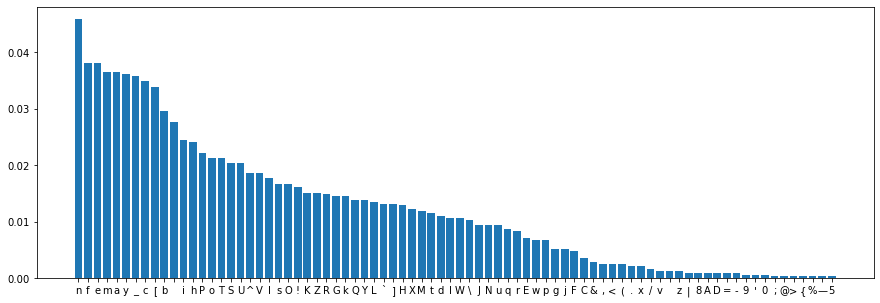

In [56]:
### 2.4.2.1 application sur du Vigenère
plot_freq(compute_frequency(coded_farm))

On conclu que la répartition statistique est beaucoup moins clair et on sait par avance qu'il sera impossible d'effectuer un attaque par fréquence directe.

**Réponse textuelle 2.4.2.2**
Plus la clé est longue, plus la répartition des fréquences sera homogène. Il faudra aussi utiliser une clé utilisant des caractères spéciaux pour atteindre cet objectif.

**Réponse textuelle 2.4.2.3.1**
L'évolution du nombre de tentative est $N ^L$  avec N la taille du tableau de chiffrage et L la longeur de la clé ce qui rend impossible une attaque par force brute s'il y a plus que quelques caractères dans la clé.


In [117]:
#### Attaque par force brute

In [61]:
secret="!)9-Jy4(4C!-.-"
for i in range(95):
    for j in range(95):
            key=ASCII[i]+ASCII[j]
            ## Critère de réussite
            values=list(compute_frequency(vignemere(secret,ASCII,key,decode=True)).values())
            print(f"candidate {key=} with text {vignemere(secret,ASCII,key,decode=True)}")

candidate key='  ' with text !)9-Jy4(4C!-.-
candidate key=' !' with text !(9,Jx4'4B!,.,
candidate key=' "' with text !'9+Jw4&4A!+.+
candidate key=' #' with text !&9*Jv4%4@!*.*
candidate key=' $' with text !%9)Ju4$4?!).)
candidate key=' %' with text !$9(Jt4#4>!(.(
candidate key=' &' with text !#9'Js4"4=!'.'
candidate key=" '" with text !"9&Jr4!4<!&.&
candidate key=' (' with text !!9%Jq4 4;!%.%
candidate key=' )' with text ! 9$Jp4~4:!$.$
candidate key=' *' with text !~9#Jo4}49!#.#
candidate key=' +' with text !}9"Jn4|48!"."
candidate key=' ,' with text !|9!Jm4{47!!.!
candidate key=' -' with text !{9 Jl4z46! . 
candidate key=' .' with text !z9~Jk4y45!~.~
candidate key=' /' with text !y9}Jj4x44!}.}
candidate key=' 0' with text !x9|Ji4w43!|.|
candidate key=' 1' with text !w9{Jh4v42!{.{
candidate key=' 2' with text !v9zJg4u41!z.z
candidate key=' 3' with text !u9yJf4t40!y.y
candidate key=' 4' with text !t9xJe4s4/!x.x
candidate key=' 5' with text !s9wJd4r4.!w.w
candidate key=' 6' with text !r9

## tests

In [71]:
def test_ascii():
    dic=[chr(i) for i in range(32,127)]
    message="""Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""
    

In [72]:
test_abc()
test_VVV()

In [73]:
dic=[chr(i) for i in range(32,127)]
message="""Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

In [74]:
def test_vigenere():
    message="j'adore ecouter la radio toute la journee"
    code=vigenere(message,dic,"MUSIQUE")
    assert(message==vignemere(code,dic,"MUSIQUE",True))

In [38]:
test_vigenere()

In [104]:
alpha="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(5):
    c="JADOR"[i]
    k="MUSIQ"[i]
    shift=alpha.index(k)
    print(f"Texte {c}, clé {k} : {shift=}, on obtient le chiffré {caesar(c,alpha,shift)}" )

Texte J, clé M : shift=12, on obtient le chiffré V
Texte A, clé U : shift=20, on obtient le chiffré U
Texte D, clé S : shift=18, on obtient le chiffré V
Texte O, clé I : shift=8, on obtient le chiffré W
Texte R, clé Q : shift=16, on obtient le chiffré H


In [81]:
c=20/70

In [87]:
6*c

1.7142857142857142